Import Libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)


Environment Setup

In [3]:
# Define the gridworld size and discount factor
grid_size = 5
gamma = 0.95
alpha = 0.1  # Learning rate
epsilon = 0.1  # Epsilon for epsilon-greedy action selection

# Define the rewards and transitions
rewards = np.full((grid_size, grid_size), -1)  # Initialize rewards with -1 for each move
rewards[2, 0] = rewards[2, 1] = rewards[2, 3] = rewards[2, 4] = -20  # Red states
rewards[4, 0] = rewards[0, 0] = rewards[0, 4] = 0  # Terminal states

# Define terminal states
terminal_states = [(0, 0), (0, 4)]


Definition of functions

In [4]:
# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right
action_indices = {(-1, 0): 0, (1, 0): 1, (0, -1): 2, (0, 1): 3}  # Map actions to indices

# Function to get the next state and reward
def get_next_state_reward(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        return (-1, state)  # Invalid move, stay in the same state with reward -1
    if next_state in terminal_states:
        return (0, next_state)  # Terminal state, no reward
    if next_state in [(2, 0), (2, 1), (2, 3), (2, 4)]:
        return (-20, (4, 0))  # Red state, return to start state with reward -20
    return (-1, next_state)  # Normal move

# Epsilon-greedy policy
def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return random.choice(actions)
    else:
        return actions[np.argmax(Q[state[0], state[1]])]


Sarsa Algorithm

In [5]:
# SARSA algorithm
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = (4, 0)
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        while state not in terminal_states:
            reward, next_state = get_next_state_reward(state, action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            total_reward += reward

            Q[state[0], state[1], action_indices[action]] += alpha * (reward + gamma * Q[next_state[0], next_state[1], action_indices[next_action]] - Q[state[0], state[1], action_indices[action]])

            state = next_state
            action = next_action

        rewards_per_episode.append(total_reward)
    return Q, rewards_per_episode

# Parameters
num_episodes = 10000

# Train SARSA
Q_sarsa, rewards_sarsa = sarsa(None, num_episodes, alpha, gamma, epsilon)


Q-Learning Algorithm

In [6]:
# Q-learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = (4, 0)
        total_reward = 0

        while state not in terminal_states:
            action = epsilon_greedy_policy(Q, state, epsilon)
            reward, next_state = get_next_state_reward(state, action)
            total_reward += reward

            Q[state[0], state[1], action_indices[action]] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action_indices[action]])

            state = next_state

        rewards_per_episode.append(total_reward)
    return Q, rewards_per_episode

# Train Q-learning
Q_q_learning, rewards_q_learning = q_learning(None, num_episodes, alpha, gamma, epsilon)


Plotting Functions

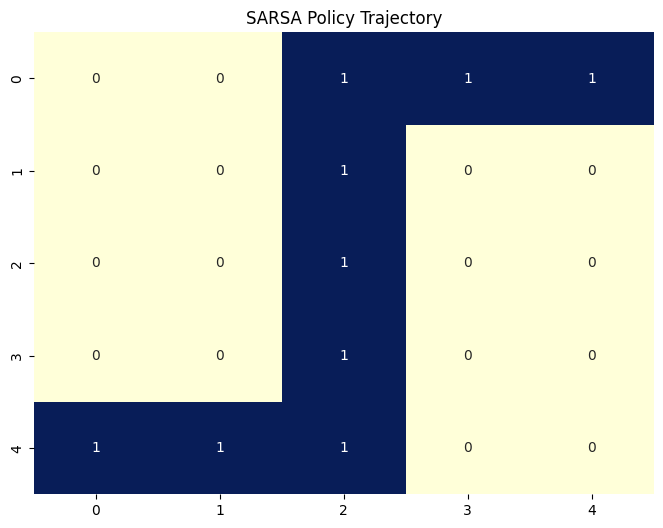

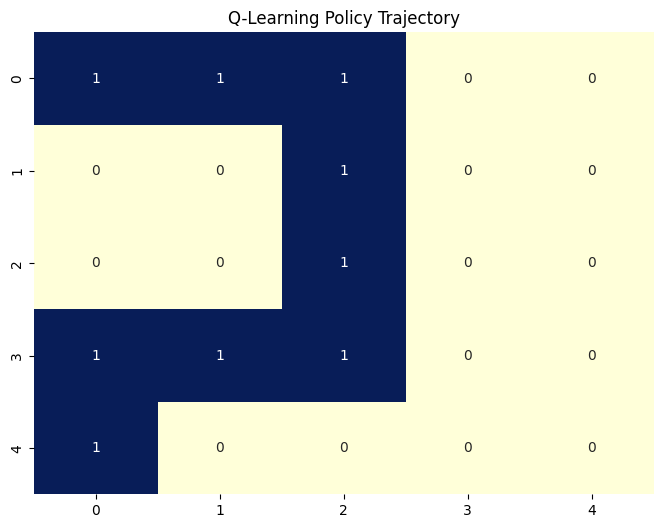

In [8]:
# Plot trajectory
def plot_trajectory(Q, title):
    state = (4, 0)
    trajectory = [state]
    while state not in terminal_states:
        action_index = np.argmax(Q[state[0], state[1]])
        action = actions[action_index]
        _, next_state = get_next_state_reward(state, action)
        trajectory.append(next_state)
        state = next_state
        if state in terminal_states:
            break

    grid = np.zeros((grid_size, grid_size))
    for (i, j) in trajectory:
        grid[i, j] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(grid, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(title)
    plt.show()

# Plot trajectories
plot_trajectory(Q_sarsa, "SARSA Policy Trajectory")
plot_trajectory(Q_q_learning, "Q-Learning Policy Trajectory")


Plotting Sum of Rewards

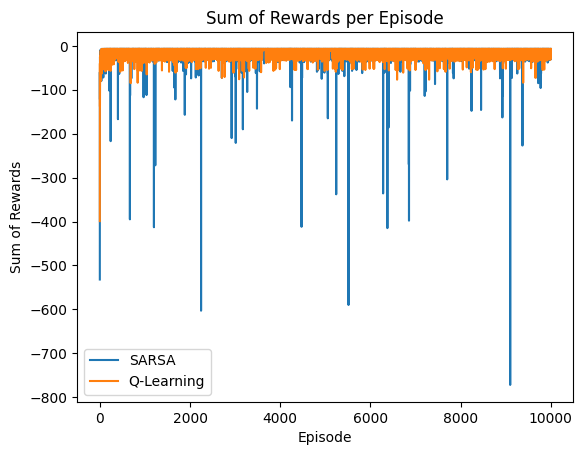

In [9]:
# Plot rewards
plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards')
plt.title('Sum of Rewards per Episode')
plt.legend()
plt.show()
